# **Importing libararies**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# **Import dataset**

In [2]:
df=pd.read_csv('nfl_team_stats.csv')
df.head()

,date,away,home,first_downs_away,first_downs_home,third_downs_away,third_downs_home,fourth_downs_away,fourth_downs_home,passing_yards_away,passing_yards_home,rushing_yards_away,rushing_yards_home,total_yards_away,total_yards_home,comp_att_away,comp_att_home,sacks_away,sacks_home,rushing_attempts_away,rushing_attempts_home,fumbles_away,fumbles_home,int_away,int_home,turnovers_away,turnovers_home,penalties_away,penalties_home,redzone_away,redzone_home,drives_away,drives_home,def_st_td_away,def_st_td_home,possession_away,possession_home,score_away,score_home,home_team_won
0,2002-09-05,49ers,Giants,13,21,4-12,9-16,0-0,0-1,166,318,113,43,279,361,16-26,28-45,0-0,3-24,25,22,0,0,1,3,1,3,5-29,10-80,0-8,0-6,13,15,0,0,27:32,32:28,16,13,no
1,2002-09-08,Jets,Bills,18,26,2-8,7-17,0-0,2-2,193,242,73,142,266,384,24-30,26-39,3-17,4-29,14,32,1,1,0,2,1,3,10-90,10-82,0-9,0-8,17,18,2,0,21:06,39:08,37,31,no
2,2002-09-08,Vikings,Bears,19,20,5-13,7-13,0-0,0-0,228,288,140,80,368,368,16-28,20-33,1-6,1-9,33,26,1,1,2,1,3,2,8-52,4-33,0-7,0-6,17,17,0,0,31:31,28:29,23,27,yes
3,2002-09-08,Chargers,Bengals,27,13,6-10,4-11,0-0,0-0,160,167,241,36,401,203,15-19,18-31,1-0,4-31,45,13,0,0,0,1,0,1,4-39,9-57,0-7,0-5,11,15,0,0,37:48,22:12,34,6,no
4,2002-09-08,Chiefs,Browns,24,24,5-11,4-11,0-0,0-0,276,352,194,59,470,411,20-29,28-40,0-0,1-7,30,20,0,1,1,0,1,1,9-87,4-38,0-10,0-10,20,17,0,0,30:16,29:44,40,39,no


# **Data preprocessing**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5072 entries, 0 to 5071
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   date                   5072 non-null   object
 1   away                   5072 non-null   object
 2   home                   5072 non-null   object
 3   first_downs_away       5072 non-null   int64 
 4   first_downs_home       5072 non-null   int64 
 5   third_downs_away       5072 non-null   object
 6   third_downs_home       5072 non-null   object
 7   fourth_downs_away      5072 non-null   object
 8   fourth_downs_home      5072 non-null   object
 9   passing_yards_away     5072 non-null   int64 
 10  passing_yards_home     5072 non-null   int64 
 11  rushing_yards_away     5072 non-null   int64 
 12  rushing_yards_home     5072 non-null   int64 
 13  total_yards_away       5072 non-null   int64 
 14  total_yards_home       5072 non-null   int64 
 15  comp_att_away        

In [4]:
df.describe()

,first_downs_away,first_downs_home,passing_yards_away,passing_yards_home,rushing_yards_away,rushing_yards_home,total_yards_away,total_yards_home,rushing_attempts_away,rushing_attempts_home,fumbles_away,fumbles_home,int_away,int_home,turnovers_away,turnovers_home,drives_away,drives_home,def_st_td_away,def_st_td_home,score_away,score_home
count,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000
mean,18.988170,19.894125,221.475355,227.372437,110.376972,117.759464,331.852326,345.131901,26.636632,27.705244,0.646096,0.643927,0.960174,0.908320,1.606270,1.552248,12.353115,12.287066,0.339117,0.356270,21.096609,23.383675
std,5.084482,4.986397,79.055399,78.142467,50.869783,52.190436,86.520083,83.982084,7.876403,7.844002,0.815660,0.803627,1.026176,1.002892,1.341414,1.327482,2.632135,2.532612,0.802373,0.824734,10.118024,10.306479
min,3.000000,3.000000,-7.000000,6.000000,-18.000000,-3.000000,26.000000,77.000000,6.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,16.750000,165.000000,173.000000,74.000000,81.000000,272.000000,287.000000,21.000000,22.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,11.000000,11.000000,0.000000,0.000000,14.000000,16.000000
50%,19.000000,20.000000,218.000000,222.000000,103.000000,111.000000,331.000000,344.000000,26.000000,27.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,12.000000,12.000000,0.000000,0.000000,20.000000,23.000000
75%,22.000000,23.000000,275.000000,277.000000,139.000000,148.000000,390.000000,402.000000,32.000000,33.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,14.000000,14.000000,0.000000,0.000000,27.000000,30.000000
max,37.000000,40.000000,516.000000,522.000000,404.000000,378.000000,643.000000,653.000000,57.000000,60.000000,5.000000,4.000000,6.000000,6.000000,8.000000,7.000000,26.000000,25.000000,6.000000,6.000000,59.000000,62.000000


In [5]:
df.shape

(5072, 40)

In [6]:
df.columns

Index(['date', 'away', 'home', 'first_downs_away', 'first_downs_home',
       'third_downs_away', 'third_downs_home', 'fourth_downs_away',
       'fourth_downs_home', 'passing_yards_away', 'passing_yards_home',
       'rushing_yards_away', 'rushing_yards_home', 'total_yards_away',
       'total_yards_home', 'comp_att_away', 'comp_att_home', 'sacks_away',
       'sacks_home', 'rushing_attempts_away', 'rushing_attempts_home',
       'fumbles_away', 'fumbles_home', 'int_away', 'int_home',
       'turnovers_away', 'turnovers_home', 'penalties_away', 'penalties_home',
       'redzone_away', 'redzone_home', 'drives_away', 'drives_home',
       'def_st_td_away', 'def_st_td_home', 'possession_away',
       'possession_home', 'score_away', 'score_home', 'home_team_won'],
      dtype='object')

In [7]:
df.corr()

,first_downs_away,first_downs_home,passing_yards_away,passing_yards_home,rushing_yards_away,rushing_yards_home,total_yards_away,total_yards_home,rushing_attempts_away,rushing_attempts_home,fumbles_away,fumbles_home,int_away,int_home,turnovers_away,turnovers_home,drives_away,drives_home,def_st_td_away,def_st_td_home,score_away,score_home
first_downs_away,1.000000,-0.085056,0.651912,0.076060,0.383415,-0.205749,0.821097,-0.057091,0.360843,-0.428681,-0.041380,-0.071252,-0.079687,-0.029101,-0.086122,-0.065120,-0.131935,-0.131835,-0.077806,0.003027,0.583707,0.045703
first_downs_home,-0.085056,1.000000,0.080634,0.633143,-0.192940,0.335298,-0.039763,0.797488,-0.383395,0.325711,-0.040391,-0.020728,-0.031694,-0.070753,-0.048805,-0.066001,-0.102250,-0.108430,0.023713,-0.092196,0.064441,0.545171
passing_yards_away,0.651912,0.080634,1.000000,0.179375,-0.168066,-0.070125,0.814908,0.123324,-0.137427,-0.197388,0.006441,-0.090033,-0.007091,-0.071175,-0.001508,-0.108276,-0.044294,-0.047999,-0.086428,0.030636,0.451449,0.182665
passing_yards_home,0.076060,0.633143,0.179375,1.000000,-0.046720,-0.217873,0.136430,0.795069,-0.157760,-0.167706,-0.072396,0.032277,-0.089709,0.004170,-0.112648,0.022690,-0.034546,-0.026583,0.054906,-0.090169,0.218144,0.412135
rushing_yards_away,0.383415,-0.192940,-0.168066,-0.046720,1.000000,-0.241441,0.434388,-0.193514,0.763599,-0.399096,-0.083444,0.054224,-0.159723,0.147663,-0.172927,0.144383,-0.022241,0.008154,0.044466,-0.060330,0.389376,-0.228873
rushing_yards_home,-0.205749,0.335298,-0.070125,-0.217873,-0.241441,1.000000,-0.206030,0.418724,-0.371316,0.740475,0.059676,-0.072160,0.126533,-0.171514,0.133083,-0.173260,0.020507,-0.010859,-0.078794,0.018159,-0.248085,0.367992
total_yards_away,0.821097,-0.039763,0.814908,0.136430,0.434388,-0.206030,1.000000,-0.001093,0.323390,-0.415007,-0.043176,-0.050384,-0.100389,0.021784,-0.103050,-0.014044,-0.053549,-0.039063,-0.052827,-0.007479,0.641434,0.032339
total_yards_home,-0.057091,0.797488,0.123324,0.795069,-0.193514,0.418724,-0.001093,1.000000,-0.377543,0.304122,-0.030277,-0.014810,-0.004838,-0.102707,-0.022111,-0.086560,-0.019400,-0.031483,0.002122,-0.072614,0.048804,0.612165
rushing_attempts_away,0.360843,-0.383395,-0.137427,-0.157760,0.763599,-0.371316,0.323390,-0.377543,1.000000,-0.575416,-0.115206,0.164489,-0.241478,0.261355,-0.254782,0.297028,0.027412,0.061223,0.095763,-0.071595,0.409637,-0.416602
rushing_attempts_home,-0.428681,0.325711,-0.197388,-0.167706,-0.399096,0.740475,-0.415007,0.304122,-0.575416,1.000000,0.145785,-0.099804,0.259798,-0.236490,0.287390,-0.239084,0.072751,0.047282,-0.090144,0.059674,-0.455053,0.371323


In [8]:
# Determine number of home team won ,loss and tie matches

Won = df[df['home_team_won'] == 'yes']
loss = df[df['home_team_won'] == 'no']
tie  = df[df['home_team_won']=='tie']
print('home team won: {}'.format(len(df[df['home_team_won'] == 'yes'])))
print('home team loss: {}'.format(len(df[df['home_team_won'] == 'no'])))
print('tie matches: {}'.format(len(df[df['home_team_won']=='tie'])))

home team won: 2873
home team loss: 2188
tie matches: 11


# **EDA (Exploratory data analysis)**

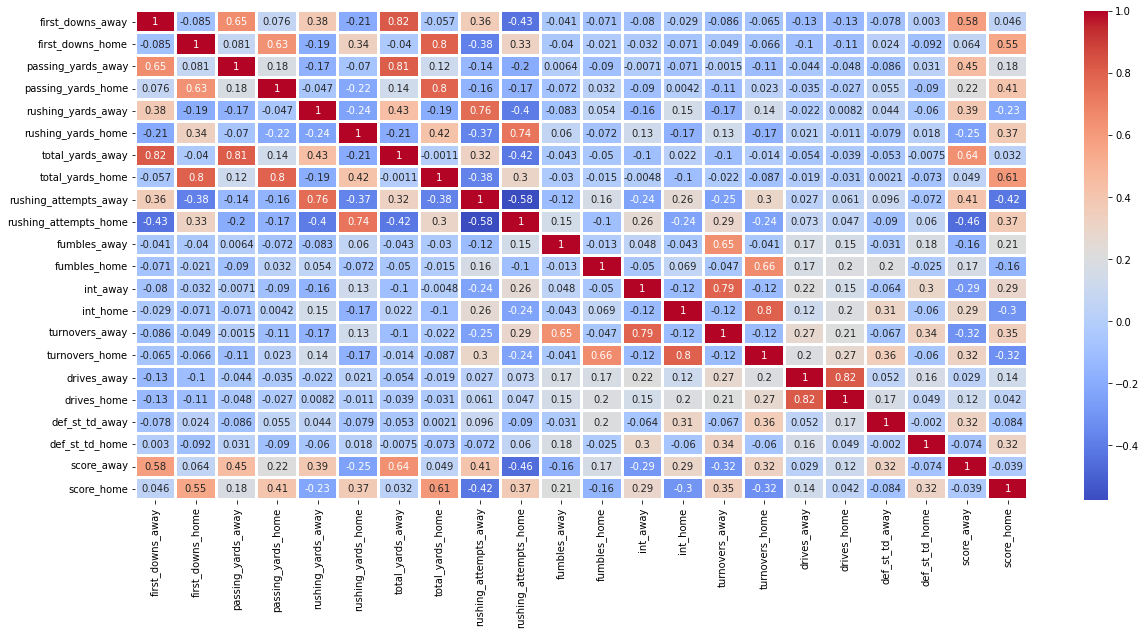

In [9]:
fig,ax=plt.subplots()
fig.set_size_inches(20,9)
sns.heatmap(df.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)

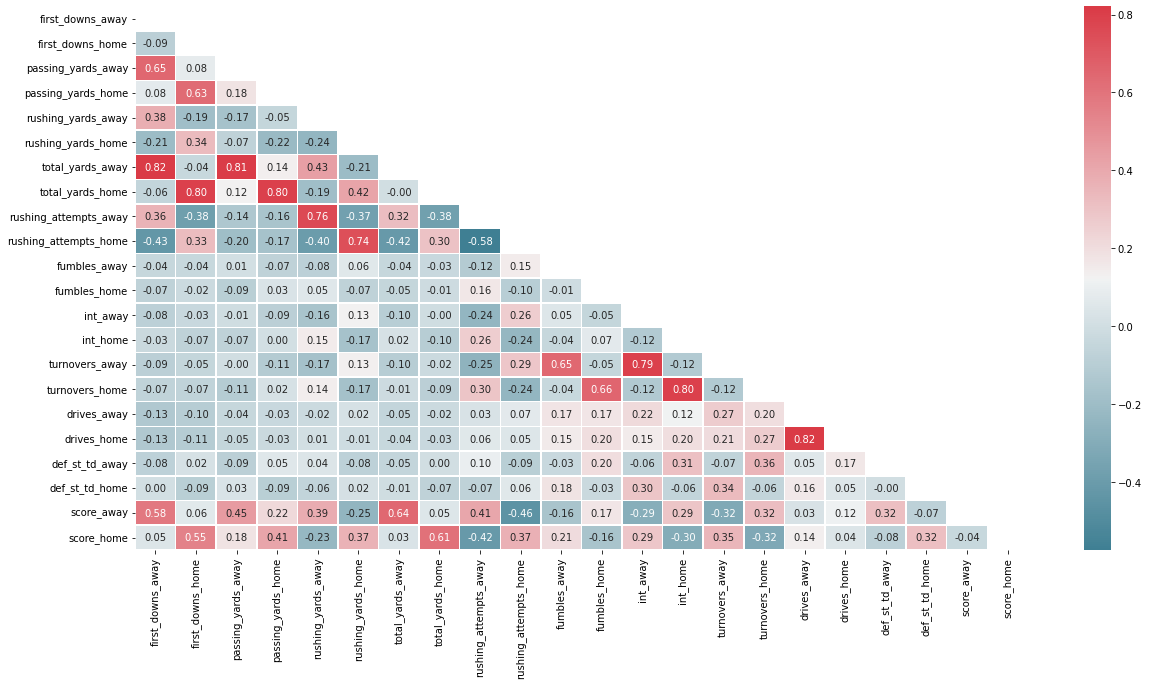

In [10]:
import numpy as np
corr = df.corr()
fig, ax = plt.subplots(figsize=(20, 10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

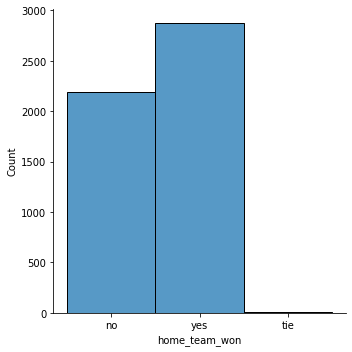

In [11]:
### checking the home team won ,loss, tie frequency
sns.displot(df['home_team_won'])

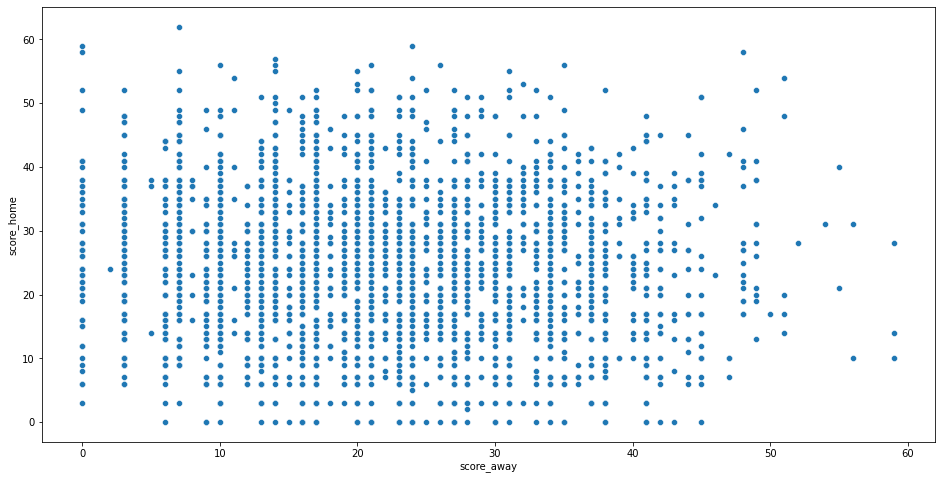

In [12]:
### scores compare of both teams 
fig,ax=plt.subplots()
fig.set_size_inches(16,8)
sns.scatterplot(df['score_away'], df['score_home'])

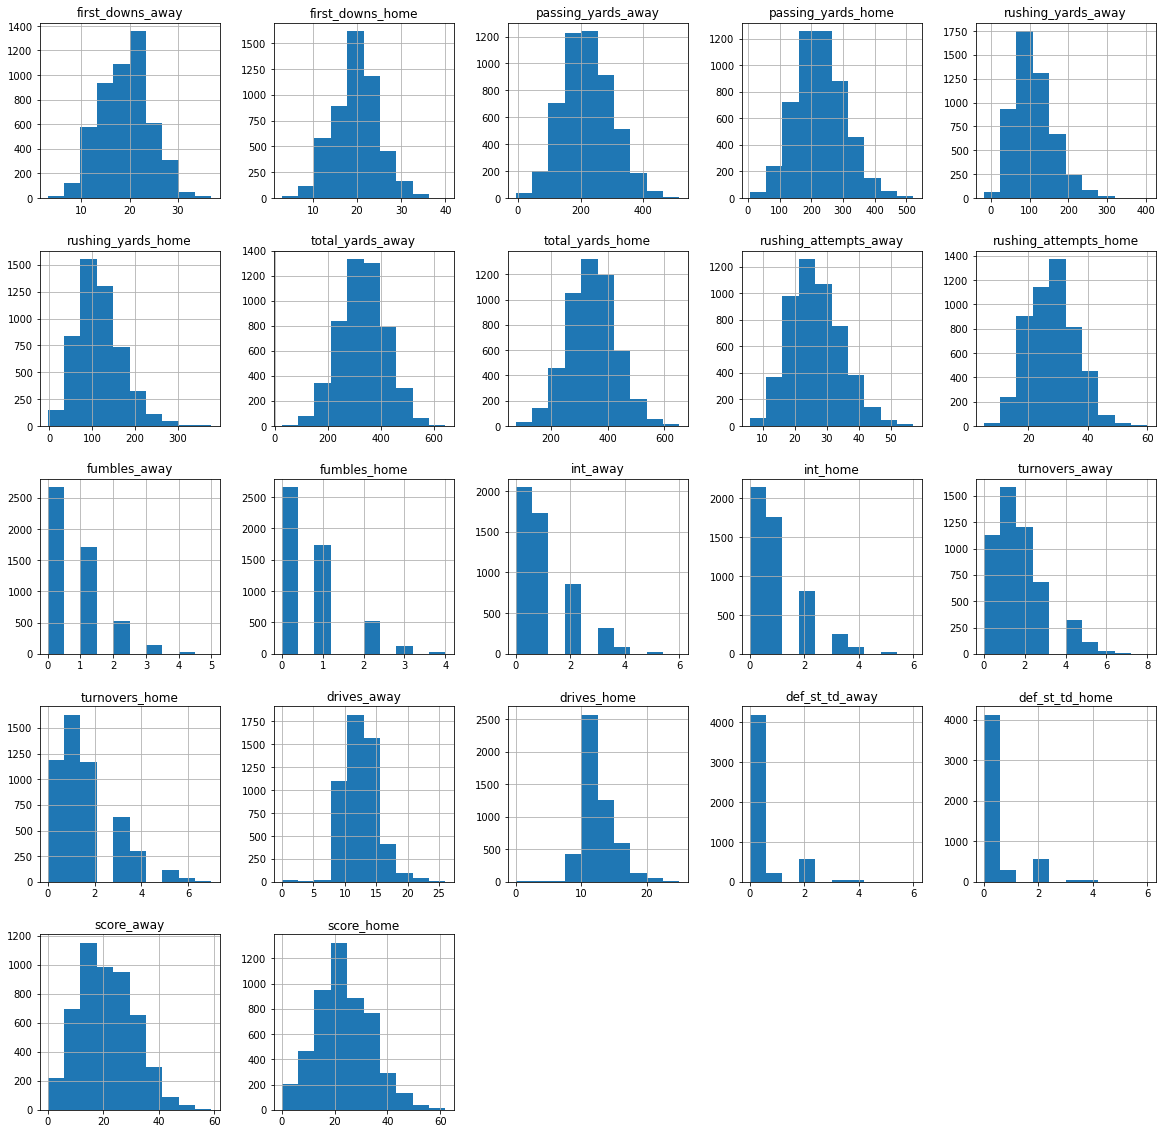

In [13]:
# Plot histograms of each parameter 
df.hist(figsize = (20, 20))
plt.show()

# **Checking missing values**

In [14]:
miss_per=df.isnull().sum()/df.shape[0]*100
miss_per

date                     0.0
away                     0.0
home                     0.0
first_downs_away         0.0
first_downs_home         0.0
third_downs_away         0.0
third_downs_home         0.0
fourth_downs_away        0.0
fourth_downs_home        0.0
passing_yards_away       0.0
passing_yards_home       0.0
rushing_yards_away       0.0
rushing_yards_home       0.0
total_yards_away         0.0
total_yards_home         0.0
comp_att_away            0.0
comp_att_home            0.0
sacks_away               0.0
sacks_home               0.0
rushing_attempts_away    0.0
rushing_attempts_home    0.0
fumbles_away             0.0
fumbles_home             0.0
int_away                 0.0
int_home                 0.0
turnovers_away           0.0
turnovers_home           0.0
penalties_away           0.0
penalties_home           0.0
redzone_away             0.0
redzone_home             0.0
drives_away              0.0
drives_home              0.0
def_st_td_away           0.0
def_st_td_home

We can see that there is no missing value in our dataset 

# **Label Encoding**

We do label encoding for changing the categorical value into the numeric form.Our machine understand the things when it is in the binary form 0,1. so first we change our categorical value in numeric form then we will gave this to the machine for taking work.  

In [15]:
#### exrract the columns that are categorical in our dataset
cat_val=df.select_dtypes(include=['bool','category','object'])

In [16]:
#### Transform these categorical columns into numeric
for var in cat_val:
  le=LabelEncoder()
  df[var]=le.fit_transform(df[var])

In [17]:
df.head()

,date,away,home,first_downs_away,first_downs_home,third_downs_away,third_downs_home,fourth_downs_away,fourth_downs_home,passing_yards_away,passing_yards_home,rushing_yards_away,rushing_yards_home,total_yards_away,total_yards_home,comp_att_away,comp_att_home,sacks_away,sacks_home,rushing_attempts_away,rushing_attempts_home,fumbles_away,fumbles_home,int_away,int_home,turnovers_away,turnovers_home,penalties_away,penalties_home,redzone_away,redzone_home,drives_away,drives_home,def_st_td_away,def_st_td_home,possession_away,possession_home,score_away,score_home,home_team_won
0,0,0,15,13,21,83,153,0,1,166,318,113,43,279,361,129,418,0,74,25,22,0,0,1,3,1,3,457,67,13,11,13,15,0,0,448,722,16,13,0
1,1,17,3,18,26,67,130,0,10,193,242,73,142,266,384,321,369,69,119,14,32,1,1,0,2,1,3,84,69,14,13,17,18,2,0,85,1099,37,31,0
2,1,30,1,19,20,98,126,0,0,228,288,140,80,368,368,131,227,20,20,33,26,1,1,2,1,3,2,689,355,12,11,17,17,0,0,687,483,23,27,2
3,1,8,2,27,13,109,81,0,0,160,167,241,36,401,203,101,178,1,121,45,13,0,0,0,1,0,1,414,695,12,10,11,15,0,0,1050,122,34,6,0
4,1,9,5,24,24,96,81,0,0,276,352,194,59,470,411,226,413,0,18,30,20,0,1,1,0,1,1,797,360,2,2,20,17,0,0,612,558,40,39,0


Now we can see that  all columns of our dataset has been completely transformed into the numeric columns.

# **Creating the independent and target variable**

In [18]:
### x is the columns except our target variable 
## y is the target variable
x=df.drop(columns='home_team_won')
y=df['home_team_won']

# **Spliting the dataset into training and testing**

In [19]:
### import command of for spliiting the dataset
from sklearn.model_selection import train_test_split

### split data 70% for the training our model and 30%  for testing our model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

# **Fitting Random forest model **

In [20]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10,criterion='entropy', random_state=0,max_depth=10)
RF_model=classifier.fit(x_train,y_train)
RF_model

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=10,
                       random_state=0)

In [21]:
# prediction by giving test samples
y_pred = classifier.predict(x_test)

In [22]:
### getting confusion matrix and classification report
from sklearn.metrics import  classification_report, confusion_matrix
print('Classifcation report:\n', classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       636
           1       0.00      0.00      0.00         4
           2       0.92      0.94      0.93       882

    accuracy                           0.92      1522
   macro avg       0.62      0.61      0.61      1522
weighted avg       0.92      0.92      0.92      1522

Confusion matrix:
 [[572   0  64]
 [  0   0   4]
 [ 49   0 833]]


In [23]:
RF_model.score(x_test,y_test)

0.9231274638633377

Our Random Forest model accuracy is 92.31% .